<a href="https://www.nlpfromscratch.com?utm_source=notebook&utm_medium=nb-header"><center><img src="../assets/coverimage_PT2.png"></center></a>

# Multimodal LLMs and Frameworks

Copyright, NLP from scratch, 2025.

[LLMSfor.me](https://llmsfor.me)

------------

In this notebook, we will work with multimodal models for image generation, most notably the [Stable Diffusion](https://en.wikipedia.org/wiki/Stable_diffusion) series of models. These are not a transformer-based model and so there is a separate libraries as part of Hugging Face (the `diffusers` library) that we must install to work with them.

In [1]:
!pip install transformers datasets diffusers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Stable Diffusion and Generating Synthetic Images 🎨

We can programmatically generate synthetic media using multimodal NLP and the power of Large Language Models (LLMs). [Stable Diffusion](https://en.wikipedia.org/wiki/Stable_Diffusion) is a very popular series of text-to-image models for this purpose which was released publicly by [Stability AI](https://stability.ai/) in August of 2022. Stable Diffusion is not a transformer architecture (and so some would say is not technically an LLM), though there are other cutting-edge image generation models based on the transformer architecture such as OpenAI's [DALL-E](https://openai.com/dall-e-2).

Stable Diffusion can be used through managed services such as [Clipdrop](https://clipdrop.co/stable-diffusion), which was used to generate the image below:

![image.png](../assets/dog.png?raw=1)

Alternatively, if we are more interested in programmatically generating content as part of an application, we can use stable diffusion as part of the Hugging Face [diffusers](https://huggingface.co/docs/diffusers) library, as the model is publicly available. Here, we will use the original [Stable Diffusion 1.4 model](https://huggingface.co/CompVis/stable-diffusion-v1-4):

In [3]:
import torch
from diffusers import StableDiffusionPipeline

# WARNING: If you are running this locally, this is a large download! (~7 GB)
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

# Use GPU
pipe.to("cuda")

# Create the image from a prompt
prompt = "Joe Biden riding a jetski over a sea of Fanta"
image = pipe(prompt).images[0]

# Save the image locally
image.save("image.png")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Now let's take a look at our image:

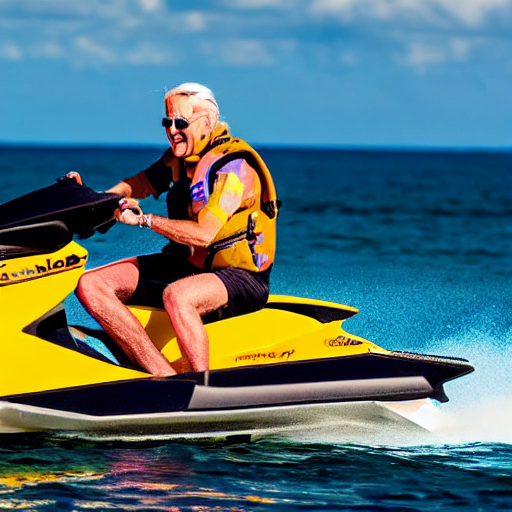

In [4]:
display(image)

In [6]:
# Delete model and clear up memory
import gc
del pipe

gc.collect()
torch.cuda.empty_cache()

NameError: name 'pipe' is not defined

## Generating High Fidelity Images with Stable Diffusion XL (SDXL)

Since the initial release of Stable Diffusion 1.4 in 2020, there have been multiple releases from Stability AI in this series of models.

Here, we will work with Stable Diffusion XL (SDXL) - this model is much larger than the original, and is actually a set of two seperate models or an *ensemble*: a base model for generating the initial image, then a second refiner model which takes the generated image (or a latent representation thereof) as input.

## Base

First, let's try using the base model only to generate an initial image. Here we will a [smaller variational autoencoder](https://huggingface.co/madebyollin/taesdxl) than the standard, and also generate smaller images (as opposed to the 1024x1024 default) given we are in a RAM constrained environment.

In [7]:
from diffusers import AutoencoderTiny, DiffusionPipeline
import torch

# Instantiate the base model pipeline
base = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16",
)

# Use a tiny distilled version of the Variational Autoencoder, as we are in a low memory environment
base.vae = AutoencoderTiny.from_pretrained("madebyollin/taesdxl", torch_dtype=torch.float16)

# Use GPU
base.to("cuda")

# Generate the image
prompt = "A super high quality 4K image of Joe Biden riding a jetski over a sea of Fanta"
output = base(prompt=prompt)
image = output.images[0]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/597 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/9.79M [00:00<?, ?B/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Let's take a look at the initial base image:

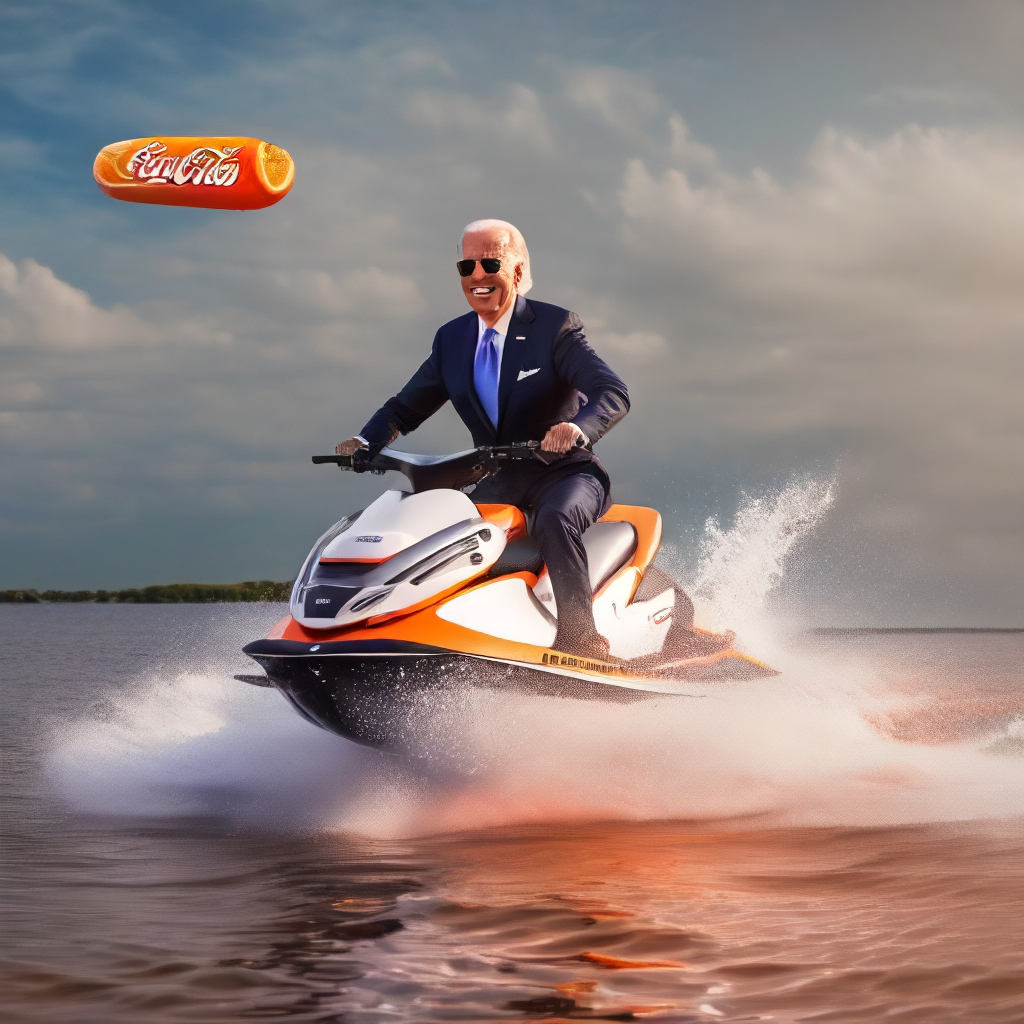

In [8]:
display(image)

Before moving onto the next section to use the refiner model, we will again clear up memory.

We'll save the base text encoder and VAE for use in the refiner model, as these should be the same:

In [9]:
base_te = base.text_encoder_2
base_vae = base.vae

del base

# Clear cache and free up RAM
gc.collect()
torch.cuda.empty_cache()

# Refiner


Now that we have the base model generated, we can pass this into the refiner model to denoise the image and make it crisper.

The code is largely the same using a pipeline, only with the refiner model and pieces passed along from the base model:

In [10]:
refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=base_te,
    vae=base_vae,
    torch_dtype=torch.float16,
    variant="fp16"
)

refiner.to("cuda")

refined_image = refiner(prompt=prompt, image=image).images[0]

model_index.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/4.52G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.71k [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

Expected types for vae: ['AutoencoderKL'], got AutoencoderTiny.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Now let's look at the refined version of the image:

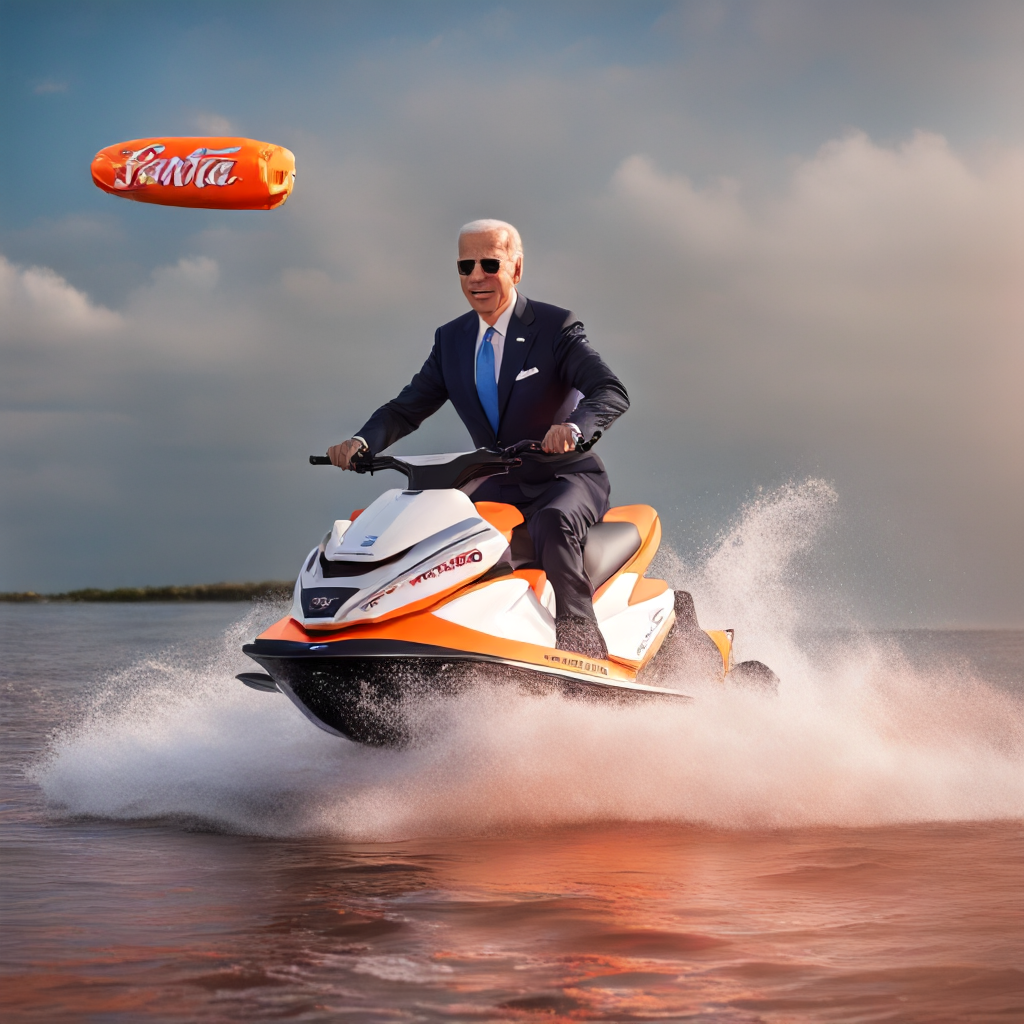

In [13]:
refined_image

Now let's compare the two images side-by-side, and see the effect the refiner model has on the base image:

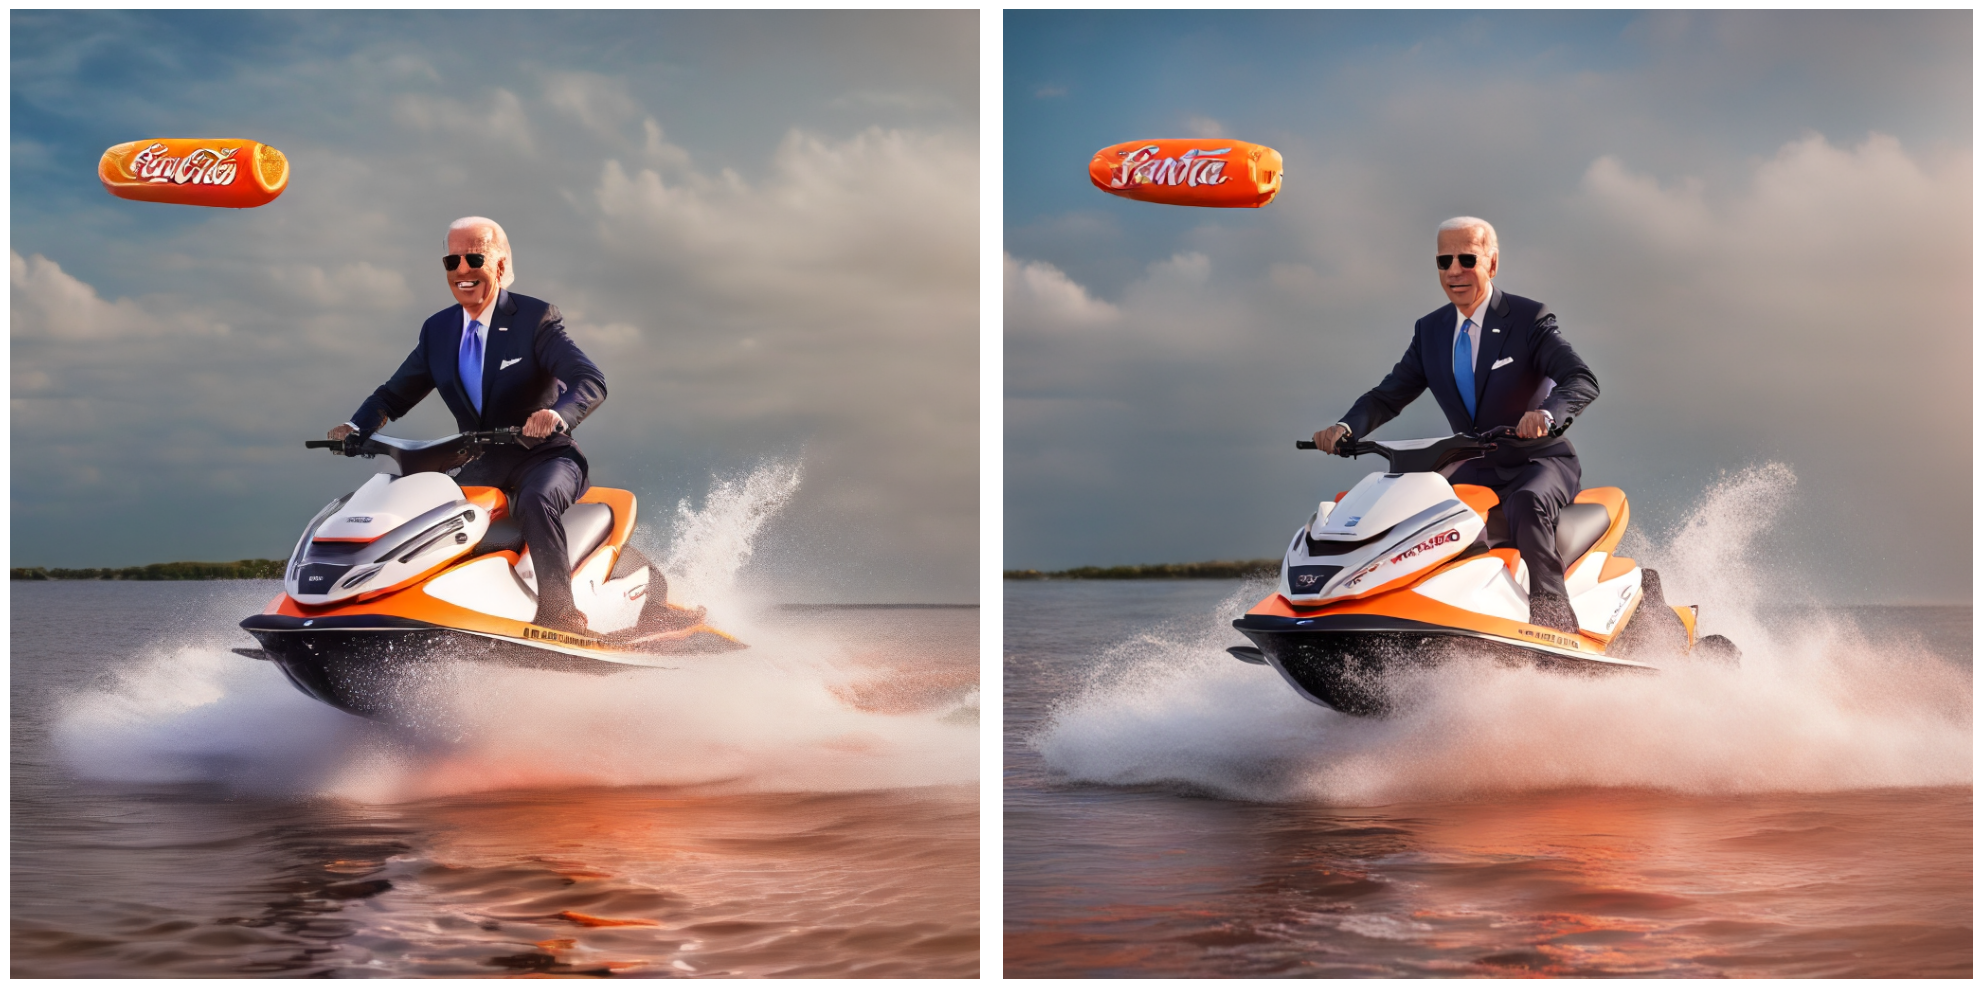

In [14]:
import matplotlib.pyplot as plt

plt.subplots(1,2, figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(image)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(refined_image)
plt.axis('off')
plt.tight_layout()

In memory-reduced environments, the results are limited. However with more powerful compute, SDXL can generate very detailed images up to 1024x1024, such as the ones below, and more advanced tasks such as [in-painting](https://huggingface.co/docs/diffusers/en/using-diffusers/sdxl#inpainting) or generating more specific outputs using other models like Controlnet, Dreambooth, or adapters.

<img src="https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0/resolve/main/01.png"/>

You can see it in action at the Hugging Face space backed by TPU from Google here: https://huggingface.co/spaces/google/sdxl

There is also [SDXL Lightning](https://huggingface.co/ByteDance/SDXL-Lightning), which is a model from ByteDance based upon SDXL, and generates images even faster than the original model.

In [15]:
# Clean up
del refiner

# Clear cache and free up RAM
gc.collect()
torch.cuda.empty_cache()

----

<table border="0" bgcolor="white">
  <tr></tr>
  <tr>
      <th align="left" style="align:left; vertical-align: bottom;"><p>Copyright NLP from scratch, 2025.</p></th>
      <th aligh="right" width="33%"><a href="https://www.nlpfromscratch.com?utm_source=notebook&utm_medium=nb-footer-img"><img src="../assets/banner.png"></th>
</tr>
</table>